In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import imblearn
from imblearn.under_sampling import RandomUnderSampler 
from pandas import DataFrame

In [15]:
pip install delayed

     |████████████████████████████████| 72 kB 1.4 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install imb

     |████████████████████████████████| 206 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 17.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_credit = pd.read_csv("creditcard.csv")
df_credit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


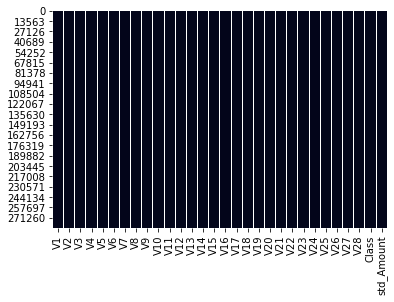

In [57]:
sns.heatmap(df.isnull(), cbar=False)

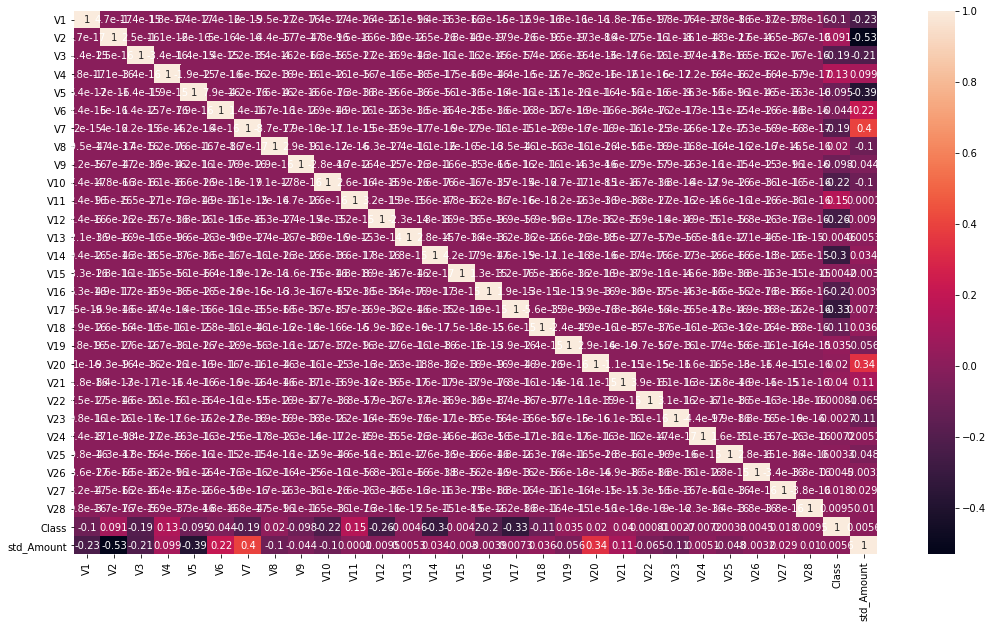

In [62]:
corrMatrix = df_credit.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:
df_credit = df_credit.drop("Time", axis=1)  # removing time as it is not required for classification

In [5]:
scaler = preprocessing.StandardScaler()

In [6]:
df_credit['std_Amount'] = scaler.fit_transform(df_credit['Amount'].values.reshape (-1,1))

In [7]:
df_credit = df_credit.drop("Amount", axis=1)

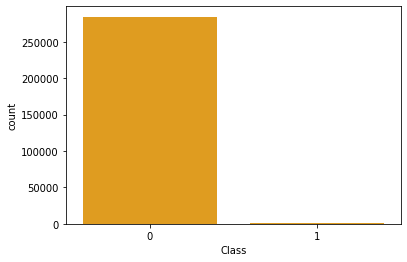

In [8]:
sns.countplot(x="Class", data=df_credit,color='orange')

In [9]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [10]:
cols = df_credit.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [11]:

X = df_credit[cols]
Y = df_credit[target]


X_u, Y_u = undersample.fit_resample(X, Y)

In [12]:
test = pd.DataFrame(Y_u, columns = ['Class'])

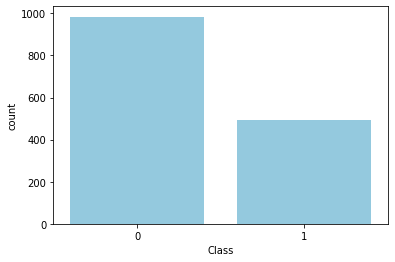

In [13]:
sns.countplot(x="Class", data=test, color='skyblue')

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_u, Y_u, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

Using TensorFlow backend.


In [17]:
#LogisticRegression

In [18]:
modell = LogisticRegression(random_state=42)
logit = modell.fit(X_train, y_train)

In [19]:
y_pred_logit = modell.predict(X_test)

In [20]:
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

Accuracy Logit: 0.9763513513513513
Precision Logit: 0.9666666666666667
Recall Logit: 0.9560439560439561
F1 Score Logit: 0.9613259668508287


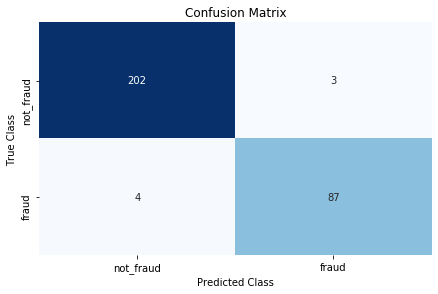

In [63]:
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [22]:
y_pred_logit_proba = modell.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9969445188957384


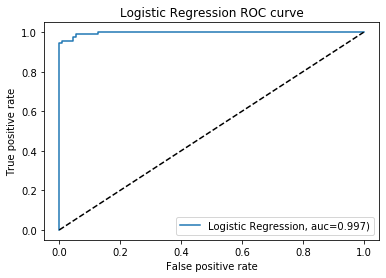

In [23]:
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

In [24]:
#SVC

In [29]:
models = SVC(probability=True, random_state=42)
svm = models.fit(X_train, y_train)

In [30]:
y_pred_svm = models.predict(X_test)

In [31]:
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9797297297297297
Precision SVM: 0.9885057471264368
Recall SVM: 0.945054945054945
F1 Score SVM: 0.9662921348314606


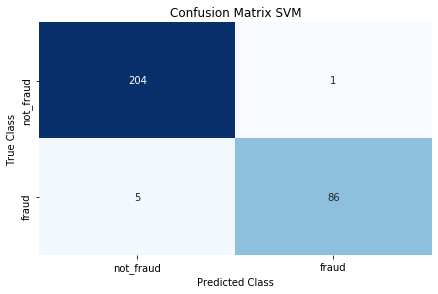

In [32]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [33]:
y_pred_svm_proba = models.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9919056553202895


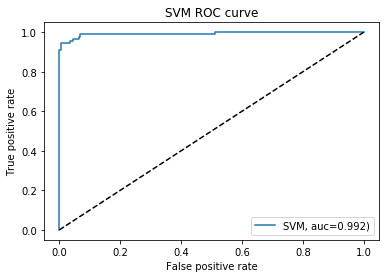

In [34]:
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

In [35]:
#RandomForestClassifier

In [41]:
modelr = RandomForestClassifier(random_state=42)
rf = modelr.fit(X_train, y_train)

In [42]:
y_pred_rf = modelr.predict(X_test)

In [43]:
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9662162162162162
Precision RF: 0.945054945054945
Recall RF: 0.945054945054945
F1 Score RF: 0.945054945054945


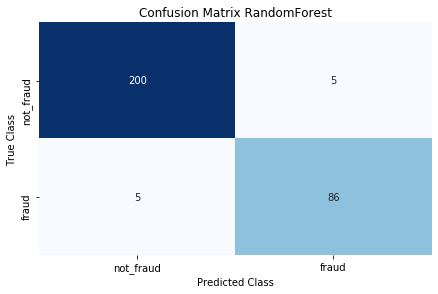

In [64]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RandomForest"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [45]:
y_pred_rf_proba = modelr.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.994398284642187


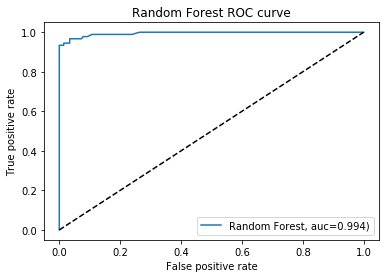

In [46]:
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()